In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Importing Libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading data

In [56]:
df_credit = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df_credit.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Finding Missing values per column.

In [58]:
df_credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# finding duplicate values 

In [59]:
df_credit.duplicated().sum()

1081

In [60]:
df_credit.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [61]:
df_credit['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [62]:
df_credit['Class'].value_counts(normalize=True) * 100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

# Exploratory Data analysis (EDA)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


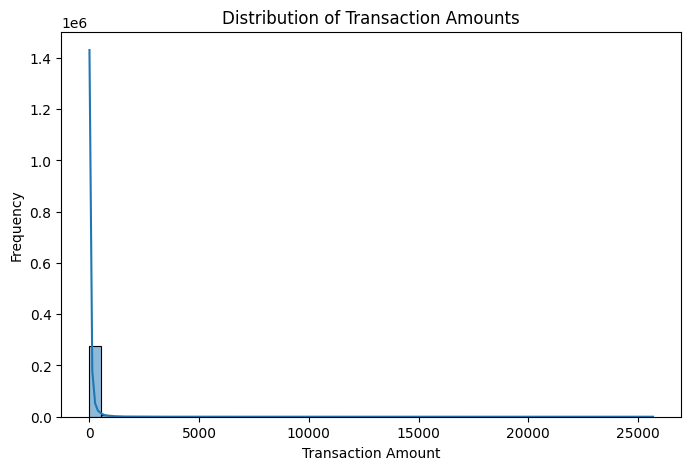

In [63]:
plt.figure(figsize=(8,5))
sns.histplot(df_credit['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()



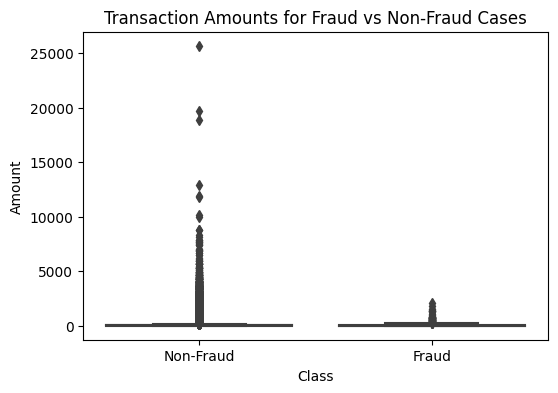

In [64]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_credit['Class'], y=df_credit['Amount'])
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.title("Transaction Amounts for Fraud vs Non-Fraud Cases")
plt.show()








# Customer segmentation with K-means clustering

In [65]:
from sklearn.preprocessing import StandardScaler

df_credit['Hour'] = df_credit['Time'] // 3600 % 24

scaler = StandardScaler()
df_credit[['Amount', 'Hour']] = scaler.fit_transform(df_credit[['Amount', 'Hour']])

print(df_credit.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27       V28    Amount 

In [66]:
from sklearn.cluster import KMeans

features = ['Amount', 'Hour'] + [f'V{i}' for i in range(1, 29)]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_credit['RiskCluster'] = kmeans.fit_predict(df_credit[features])

print(df_credit[['Amount', 'Hour', 'RiskCluster']].head())


     Amount     Hour  RiskCluster
0  0.244964 -2.40693            2
1 -0.342475 -2.40693            0
2  1.160686 -2.40693            2
3  0.140534 -2.40693            2
4 -0.073403 -2.40693            2


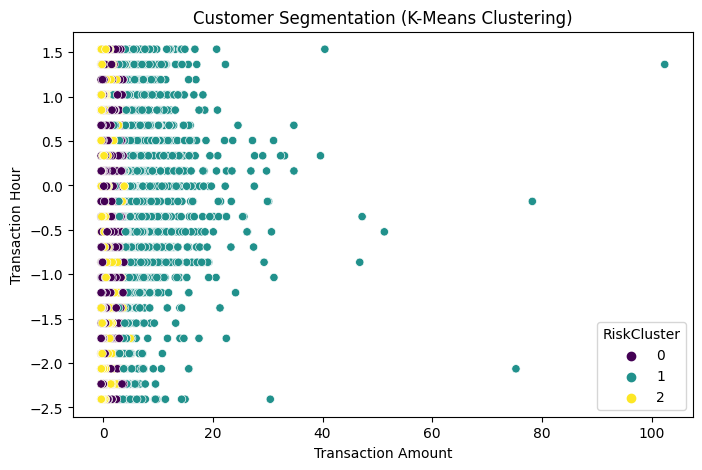

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_credit['Amount'], y=df_credit['Hour'], hue=df_credit['RiskCluster'], palette='viridis')
plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Hour")
plt.show()


# Prepare Data for Training



In [68]:
from sklearn.model_selection import train_test_split

features = ['Amount', 'Hour', 'RiskCluster'] + [f'V{i}' for i in range(1, 29)]
X = df_credit[features]
y = df_credit['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)


(227845, 31) (56962, 31)


In [69]:
print(y_test.shape, y_pred.shape)


(56962,) (56962,)


# Training a Model

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))



Accuracy: 0.9995786664794073
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9405    0.8061    0.8681        98

    accuracy                         0.9996     56962
   macro avg     0.9701    0.9030    0.9340     56962
weighted avg     0.9996    0.9996    0.9996     56962



# Identify High-Risk Transactions

In [71]:
import pandas as pd
import pandasql as ps

query = """
SELECT Class, COUNT(*) AS TransactionCount, AVG(Amount) AS AvgTransactionValue
FROM df_credit
GROUP BY Class
"""

result = ps.sqldf(query, locals())
print(result)


   Class  TransactionCount  AvgTransactionValue
0      0            284315            -0.000234
1      1               492             0.135382


# Detect Unusual Transactions

In [72]:
query = """
SELECT Amount, Time AS TransactionDate
FROM df_credit
WHERE Amount > (SELECT AVG(Amount) FROM df_credit) * 3
"""

result = ps.sqldf(query, locals())
print(result)


         Amount  TransactionDate
0      0.244964              0.0
1      1.160686              1.0
2      0.140534              1.0
3      0.019392              7.0
4      0.132538             10.0
...         ...              ...
64402  0.270472         172743.0
64403  0.446388         172745.0
64404  0.029108         172756.0
64405  0.146491         172759.0
64406  0.514355         172792.0

[64407 rows x 2 columns]


 # Find Transactions Outside Usual Hours


In [73]:
query = """
SELECT Amount, Time AS TransactionDate, Hour
FROM df_credit
WHERE Hour NOT BETWEEN 6 AND 22
"""

result = ps.sqldf(query, locals())
print(result)


          Amount  TransactionDate     Hour
0       0.244964              0.0 -2.40693
1      -0.342475              0.0 -2.40693
2       1.160686              1.0 -2.40693
3       0.140534              1.0 -2.40693
4      -0.073403              2.0 -2.40693
...          ...              ...      ...
284802 -0.350151         172786.0  1.53423
284803 -0.254117         172787.0  1.53423
284804 -0.081839         172788.0  1.53423
284805 -0.313249         172788.0  1.53423
284806  0.514355         172792.0  1.53423

[284807 rows x 3 columns]
